In [1]:
import pandas as pd
from IPython.display import display
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('hungarian_nt_matches.csv')

In [3]:
df.head()

,away_goals,home_goals,opponent_goals,date,hungary_goals,opponent,home_or_away,outcome,match_type
0,1,4,1,1907-11-03,4,Austria,H,W,Friendly
1,3,5,5,1907-10-06,3,Czech Republic,A,L,Friendly
2,2,5,2,1907-04-07,5,Czech Republic,H,W,Friendly
3,3,5,3,1908-11-01,5,Austria,H,W,Friendly
4,7,0,7,1908-06-10,0,England,H,L,Friendly


In [4]:
def grouped_histograms(grouped_df):
    num_groups = len(grouped_df.groups)
    fig, axs = plt.subplots(int(num_groups/2), 2, figsize=(10, 5*int(num_groups/2)))
    row_count = 0
    counter = 0
    for t in sorted(grouped_df.groups):
        if num_groups == 2:
            if counter == 0:
                current_axis = axs[0]
            else:
                current_axis = axs[1]
        else:
            if counter % 2 == 0:
                current_axis = axs[row_count][0]
            else:
                current_axis = axs[row_count][1]
        grp = grouped_df.get_group(t)
        grp['outcome'].value_counts().reindex(['W', 'D', 'L']).plot(kind='bar', ax=current_axis)
        current_axis.set_title(t)
        if counter > 0 and counter % 2 == 0:
            row_count += 1
        counter += 1

    plt.show()

## Stats by match type

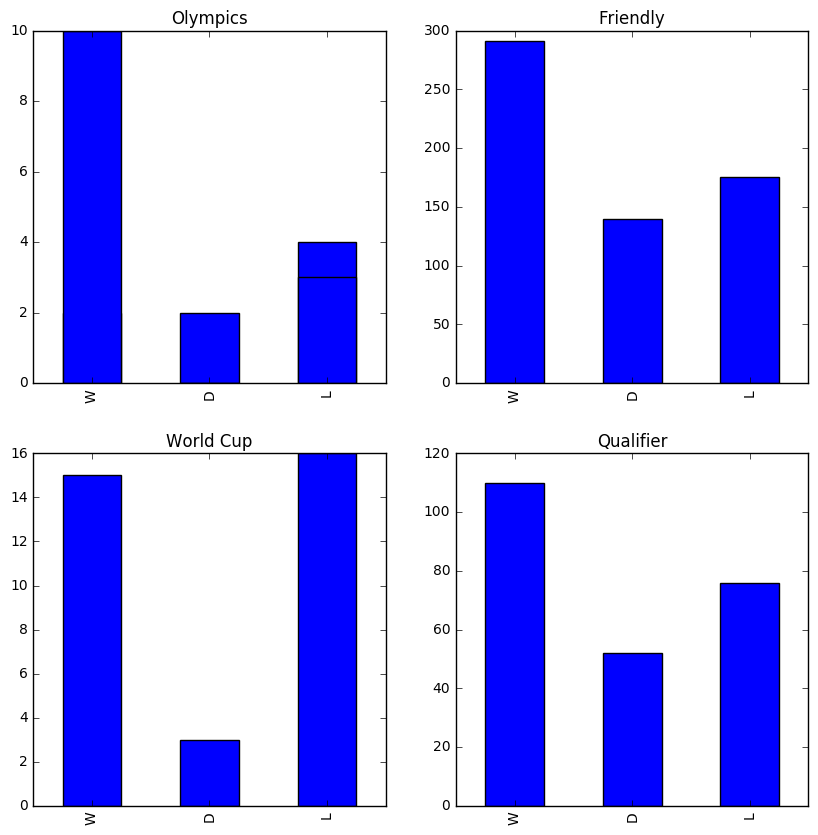

In [5]:
by_type = df.groupby(by='match_type')
grouped_histograms(by_type)

## Stats by Home/Away

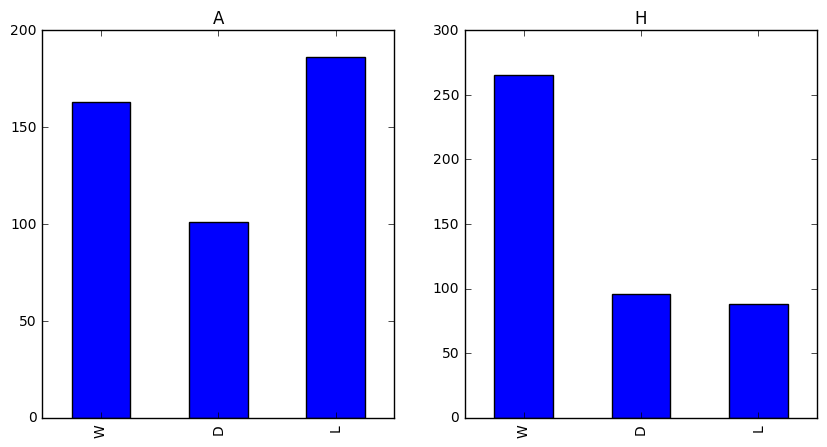

In [6]:
by_hoa = df.groupby(by='home_or_away')
grouped_histograms(by_hoa)

## Stats by Opponent

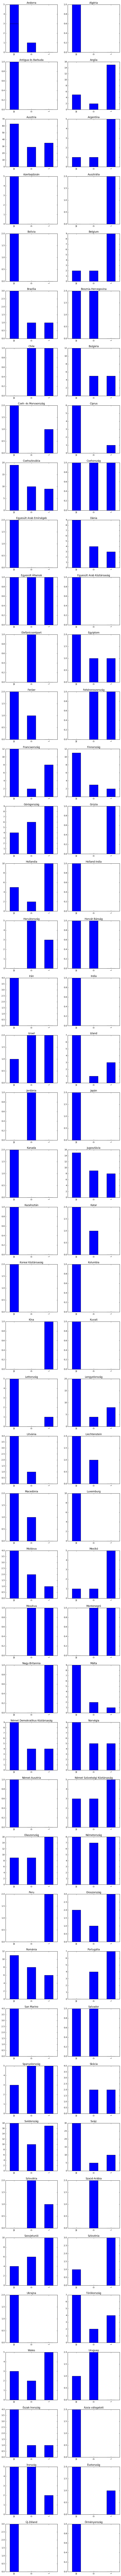

In [10]:
by_opponent = df.groupby(by='opponent')
grouped_histograms(by_opponent)